In [1]:
# from tensorflow.python.client import device_lib

# def get_avaliable_gpu():
#     local_devices = device_lib.list_local_devices()
#     return [x.name for x in local_devices if x.device_type == "gpu"]

In [2]:
# print(get_avaliable_gpu())

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)] # pental length, width
y = (iris.target == 0).astype(int) # iris setosa?

In [4]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.8.0'

In [7]:
keras.__version__

'2.8.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
val_size = 5000

X_val, X_train = X_train[:val_size] / 255.0, X_train[val_size:] / 255.0
y_val, y_train = y_train[:val_size], y_train[val_size:]
X_test = X_test / 255.0

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

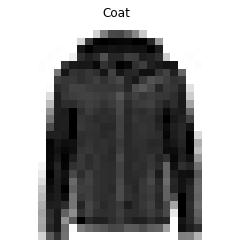

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(X_train[0], cmap="binary")
plt.title(class_names[y_train[0]])
plt.axis("off")
plt.show()

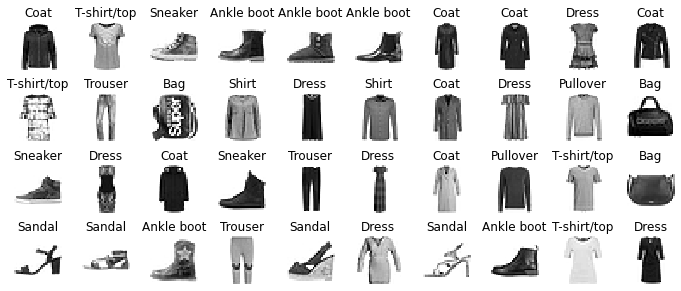

In [13]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [14]:
model = keras.models.Sequential()

# input layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# hidden layers
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
# instead of activation="relu" we can go with activation=keras.activations.relu

# output layer
model.add(keras.layers.Dense(10, activation="softmax"))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-29 15:41:54.583312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-29 15:41:54.583442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
# same as 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
# accesing layers 
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [19]:
model.get_layer("dense_3") is hidden1

True

In [20]:
# we can manually acces its weights as well as biases
weights, biases = hidden1.get_weights()

In [21]:
weights.shape

(784, 300)

In [22]:
# same as 
# loss=keras.losses.sparse_categorical_crossentropy
# optimizer=keras.optimizers.SGD()
# metrics=[keras.metrics.sparse_categorical_accuracy]

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
# from time import time

# size = 128
# sizes = []
# for idx in range(10):

#     t0 = time()
#     with tf.device('/gpu:0'):
#         history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=size)
#     sizes.append((size, round(time() - t0, 2)))

#     size <<= 1

# # we can use also validation_split=0.1 for example so 10% of the training data will be used as validation data

In [24]:
with tf.device('/gpu:0'):
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=8192)

Epoch 1/30


2022-03-29 15:41:55.227391: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-29 15:41:55.416038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 54ms/step - loss: 2.3102 - accuracy: 0.1408 - val_loss: 2.1861 - val_accuracy: 0.2112
Epoch 2/30
4/7 [================>.............] - ETA: 0s - loss: 2.1601 - accuracy: 0.2381

2022-03-29 15:41:55.834940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 25ms/step - loss: 2.1309 - accuracy: 0.2621 - val_loss: 2.0407 - val_accuracy: 0.3386
Epoch 3/30
7/7 [==============================] - 0s 24ms/step - loss: 2.0011 - accuracy: 0.3618 - val_loss: 1.9248 - val_accuracy: 0.4168
Epoch 4/30
7/7 [==============================] - 0s 29ms/step - loss: 1.8937 - accuracy: 0.4252 - val_loss: 1.8254 - val_accuracy: 0.4692
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 1.8006 - accuracy: 0.4812 - val_loss: 1.7382 - val_accuracy: 0.5218
Epoch 6/30
7/7 [==============================] - 0s 54ms/step - loss: 1.7182 - accuracy: 0.5281 - val_loss: 1.6606 - val_accuracy: 0.5610
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 1.6443 - accuracy: 0.5642 - val_loss: 1.5903 - val_accuracy: 0.5906
Epoch 8/30
7/7 [==============================] - 0s 56ms/step - loss: 1.5772 - accuracy: 0.5898 - val_loss: 1.5266 - val_accuracy: 0.6132
Epoch 9/30
7/7 [======================

In [25]:
# from time import time

# size = 16
# sizes = []
# for idx in range(15):

#     t0 = time()
#     with tf.device('/cpu:0'):
#         history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=size)
#     sizes.append((size, round(time() - t0, 2)))

#     size <<= 1

# # we can use also validation_split=0.1 for example so 10% of the training data will be used as validation data

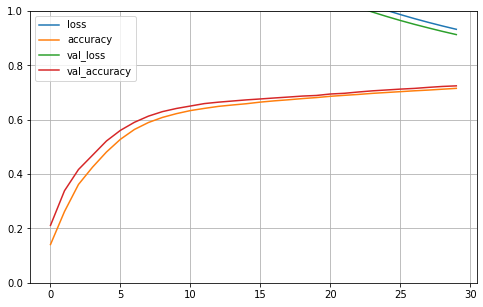

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.9377 - accuracy: 0.7085


[0.9377349019050598, 0.7085000276565552]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

y_proba.round(3)
# for probability

2022-03-29 15:42:05.882822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.003, 0.001, 0.007, 0.003, 0.006, 0.236, 0.009, 0.275, 0.082,
        0.378],
       [0.013, 0.   , 0.545, 0.004, 0.21 , 0.004, 0.192, 0.001, 0.029,
        0.004],
       [0.029, 0.846, 0.003, 0.106, 0.009, 0.002, 0.004, 0.   , 0.001,
        0.001]], dtype=float32)

In [29]:
import numpy as np

y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [33]:
# sequential API

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

In [34]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
 29/363 [=>............................] - ETA: 1s - loss: 1.7125 

2022-03-29 15:42:06.312734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 0.7771

2022-03-29 15:42:07.986562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 0.7771 - val_loss: 9.5662
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 2.2103 - val_loss: 3.5039
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5509 - val_loss: 0.4288
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3975 - val_loss: 0.3981
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3749 - val_loss: 0.3889
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3627 - val_loss: 0.3907
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3550 - val_loss: 0.3821
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3534 - val_loss: 0.3735
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3479 - val_loss: 0.3732
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3420 - val_loss: 0.3638
Epoch 11/2

In [35]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 3ms/step - loss: 0.3369


0.3369479775428772

In [36]:
# functional API

input_ = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.Concatenate()([input_, hidden2])

output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])


In [37]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
 25/363 [=>............................] - ETA: 1s - loss: 2.2652 

2022-03-29 15:42:39.958773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.4108

2022-03-29 15:42:41.637948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.4108 - val_loss: 257.1790
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 2388488259586680074826416128.0000 - val_loss: 215763747181227510071296.0000
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 60312976325281962786816.0000 - val_loss: 1944821204486372013899776.0000
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 1118078559412965188042752.0000 - val_loss: 41978462278545657101811712.0000
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 17363414064042278530318336.0000 - val_loss: 894830304366477435488698368.0000
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 387467550481795923027427328.0000 - val_loss: 18659517379144967785570893824.0000
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 8172974289182649547000643584.0000 - val_loss: 395621994500047697265962254336.0000
Epo

inf

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

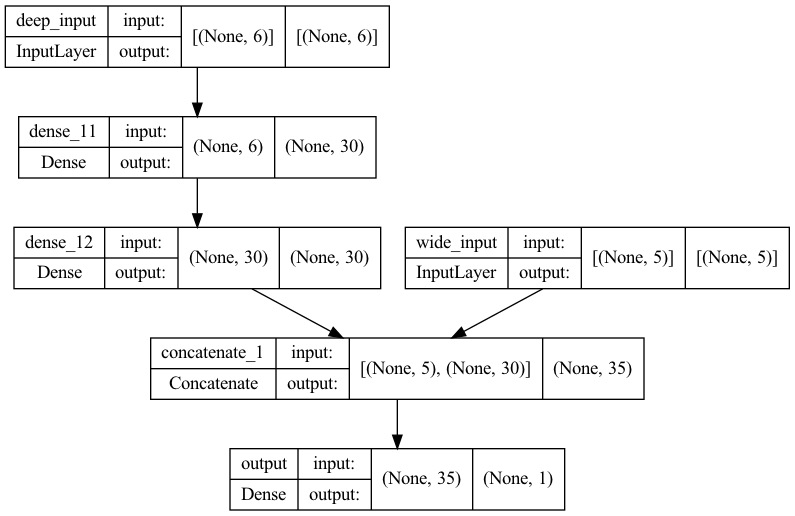

In [39]:
keras.utils.plot_model(model, "DeepAndWide.png", show_shapes=True)

In [40]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [41]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

In [42]:
# for model with two inputs we need to pass 2 sets each time

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_val_A, X_val_B), y_val))

Epoch 1/20
 26/363 [=>............................] - ETA: 1s - loss: 4.1349 

2022-03-29 15:43:24.235265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.7359

2022-03-29 15:43:25.925958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.7359 - val_loss: 0.9911
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7511 - val_loss: 0.6995
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6371 - val_loss: 0.6317
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5927 - val_loss: 0.5977
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5636 - val_loss: 0.5691
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5412 - val_loss: 0.5561
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5241 - val_loss: 0.5338
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5107 - val_loss: 0.5298
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5001 - val_loss: 0.5176
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4914 - val_loss: 0.5119
Epoch 11/2

In [43]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.4597


0.4597437083721161

In [44]:
# and multioutput 

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

In [45]:
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [46]:
# note that for each output we need to specify the loss function and the weight of each loss (here aux output will be kind of regularization)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_val_A, X_val_B), [y_val, y_val]))

Epoch 1/20
  8/363 [..............................] - ETA: 2s - loss: 5.0930 - main_output_loss: 4.9676 - aux_output_loss: 6.2225  

2022-03-29 15:44:01.246132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


360/363 [============================>.] - ETA: 0s - loss: 2.1025 - main_output_loss: 1.8364 - aux_output_loss: 4.4971

2022-03-29 15:44:04.062762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 4s 9ms/step - loss: 2.0956 - main_output_loss: 1.8295 - aux_output_loss: 4.4902 - val_loss: 1.2971 - val_main_output_loss: 1.0570 - val_aux_output_loss: 3.4582
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.9827 - main_output_loss: 0.7807 - aux_output_loss: 2.8005 - val_loss: 0.8845 - val_main_output_loss: 0.7178 - val_aux_output_loss: 2.3853
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.7873 - main_output_loss: 0.6487 - aux_output_loss: 2.0340 - val_loss: 0.7804 - val_main_output_loss: 0.6476 - val_aux_output_loss: 1.9753
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.7133 - main_output_loss: 0.6004 - aux_output_loss: 1.7293 - val_loss: 0.7209 - val_main_output_loss: 0.6014 - val_aux_output_loss: 1.7965
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6725 - main_output_loss: 0.5701 - aux_output_loss: 1.5946 - val_loss: 0.6909 - 

In [47]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])

X_new_A, X_new_B = X_train_A[:3], X_train_B[:3]
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 1s 5ms/step - loss: 0.5291 - main_output_loss: 0.4631 - aux_output_loss: 1.1235


2022-03-29 15:44:57.723748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [48]:
y_pred_main, y_pred_aux

(array([[0.90543187],
        [2.0266578 ],
        [2.2227702 ]], dtype=float32),
 array([[1.9004185],
        [2.0914853],
        [2.0016248]], dtype=float32))

In [49]:
# Subclassing API - gives us much more flexibility, however keras won't see our model as well as in sequential or functional APIs - we cannot save it, clone it or summary() wont be as accurate

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)

        self.hidden1 = keras.layers.Dense(units=units, activation=activation)
        self.hidden2 = keras.layers.Dense(units=units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs

        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])

        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)

        return main_output, aux_output

In [50]:
# saving the model
model.save("first_model.h5")

# loading the model
model = keras.models.load_model("first_model.h5")

In [51]:
# callbacks are list of objects that keras will call at certain time

# ex ModelCheckpoint will be called by default on the end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint("first_model.h5")
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_val_A, X_val_B), [y_val, y_val]), callbacks=[checkpoint_cb], batch_size=8192)

Epoch 1/20
1/2 [==============>...............] - ETA: 0s - loss: 0.5120 - main_output_loss: 0.4477 - aux_output_loss: 1.0904

2022-03-29 15:44:58.085466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 218ms/step - loss: 0.5160 - main_output_loss: 0.4505 - aux_output_loss: 1.1057 - val_loss: 0.5391 - val_main_output_loss: 0.4765 - val_aux_output_loss: 1.1024
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.5159 - main_output_loss: 0.4504 - aux_output_loss: 1.1056 - val_loss: 0.5391 - val_main_output_loss: 0.4766 - val_aux_output_loss: 1.1022
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.5159 - main_output_loss: 0.4504 - aux_output_loss: 1.1054 - val_loss: 0.5392 - val_main_output_loss: 0.4766 - val_aux_output_loss: 1.1021
Epoch 4/20
1/2 [==============>...............] - ETA: 0s - loss: 0.5146 - main_output_loss: 0.4500 - aux_output_loss: 1.0965

2022-03-29 15:44:58.369519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 41ms/step - loss: 0.5159 - main_output_loss: 0.4504 - aux_output_loss: 1.1053 - val_loss: 0.5392 - val_main_output_loss: 0.4766 - val_aux_output_loss: 1.1020
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.5159 - main_output_loss: 0.4504 - aux_output_loss: 1.1052 - val_loss: 0.5392 - val_main_output_loss: 0.4766 - val_aux_output_loss: 1.1019
Epoch 6/20
2/2 [==============================] - 0s 40ms/step - loss: 0.5158 - main_output_loss: 0.4504 - aux_output_loss: 1.1051 - val_loss: 0.5392 - val_main_output_loss: 0.4767 - val_aux_output_loss: 1.1018
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.5158 - main_output_loss: 0.4503 - aux_output_loss: 1.1049 - val_loss: 0.5392 - val_main_output_loss: 0.4767 - val_aux_output_loss: 1.1017
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.5158 - main_output_loss: 0.4503 - aux_output_loss: 1.1048 - val_loss: 0.5392 - val_main_output

In [52]:
# we can save only best model (save modelif performance on the validation set is best so far - an easy way to do an early stopping)

checkpoint_cb = keras.callbacks.ModelCheckpoint("first_model.h5", save_best_only=True)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_val_A, X_val_B), [y_val, y_val]), callbacks=[checkpoint_cb], batch_size=8192)

Epoch 1/20
2/2 [==============================] - 0s 66ms/step - loss: 0.5154 - main_output_loss: 0.4501 - aux_output_loss: 1.1033 - val_loss: 0.5394 - val_main_output_loss: 0.4771 - val_aux_output_loss: 1.1001
Epoch 2/20
2/2 [==============================] - 0s 40ms/step - loss: 0.5154 - main_output_loss: 0.4501 - aux_output_loss: 1.1032 - val_loss: 0.5394 - val_main_output_loss: 0.4772 - val_aux_output_loss: 1.1000
Epoch 3/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5153 - main_output_loss: 0.4500 - aux_output_loss: 1.1031 - val_loss: 0.5394 - val_main_output_loss: 0.4772 - val_aux_output_loss: 1.0999
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5153 - main_output_loss: 0.4500 - aux_output_loss: 1.1029 - val_loss: 0.5395 - val_main_output_loss: 0.4772 - val_aux_output_loss: 1.0998
Epoch 5/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5153 - main_output_loss: 0.4500 - aux_output_loss: 1.1028 - val_loss: 0.5394 - val_

In [53]:
# here early stopping will accualy stop the training if performance on the validation set won't improve over patience of epochs
# restore_best_weights=True will automatically make the model the best one 

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_val_A, X_val_B), [y_val, y_val]), callbacks=[checkpoint_cb, early_stopping_cb], batch_size=8192)

Epoch 1/20
2/2 [==============================] - 0s 59ms/step - loss: 0.5149 - main_output_loss: 0.4498 - aux_output_loss: 1.1010 - val_loss: 0.5394 - val_main_output_loss: 0.4773 - val_aux_output_loss: 1.0978
Epoch 2/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5149 - main_output_loss: 0.4497 - aux_output_loss: 1.1009 - val_loss: 0.5394 - val_main_output_loss: 0.4773 - val_aux_output_loss: 1.0978
Epoch 3/20
2/2 [==============================] - 0s 30ms/step - loss: 0.5148 - main_output_loss: 0.4497 - aux_output_loss: 1.1008 - val_loss: 0.5393 - val_main_output_loss: 0.4773 - val_aux_output_loss: 1.0976
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 0.5148 - main_output_loss: 0.4497 - aux_output_loss: 1.1007 - val_loss: 0.5394 - val_main_output_loss: 0.4773 - val_aux_output_loss: 1.0975
Epoch 5/20
2/2 [==============================] - 0s 30ms/step - loss: 0.5148 - main_output_loss: 0.4497 - aux_output_loss: 1.1005 - val_loss: 0.5394 - val_

In [54]:
# custom callback

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_train_begin(self, epoch, logs):
        pass
    def on_train_end(self, epoch, logs):
        pass
    def on_epoch_begin(self, epoch, logs):
        pass
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
    def on_batch_begin(self, epoch, logs):
        pass
    def on_batch_end(self, epoch, logs):
        pass

    # called by evaluate()
    def on_test_begin(self, epoch, logs):
        pass
    def on_test_end(self, epoch, logs):
        pass
    def on_test_batch_begin(self, epoch, logs):
        pass
    def on_test_batch_end(self, epoch, logs):
        pass

    # called by predict()
    def on_predict_begin(self, epoch, logs):
        pass
    def on_predict_end(self, epoch, logs):
        pass
    def on_predict_batch_begin(self, epoch, logs):
        pass
    def on_predict_batch_end(self, epoch, logs):
        pass

In [55]:
# TensorBoard

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id =  time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [56]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [57]:
# functional API

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])
model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb], batch_size=8192)

Epoch 1/40
1/2 [==============>...............] - ETA: 0s - loss: 6.9774

2022-03-29 15:45:01.754621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 164ms/step - loss: 6.6285 - val_loss: 4.9899
Epoch 2/40
2/2 [==============================] - 0s 32ms/step - loss: 4.7796 - val_loss: 3.6426
Epoch 3/40
2/2 [==============================] - 0s 30ms/step - loss: 3.5626 - val_loss: 2.8077
Epoch 4/40
2/2 [==============================] - 0s 32ms/step - loss: 2.7087 - val_loss: 2.2927
Epoch 5/40
1/2 [==============>...............] - ETA: 0s - loss: 2.1594

2022-03-29 15:45:01.983323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 38ms/step - loss: 2.1148 - val_loss: 1.9479
Epoch 6/40
2/2 [==============================] - 0s 36ms/step - loss: 1.7100 - val_loss: 1.6994
Epoch 7/40
2/2 [==============================] - 0s 65ms/step - loss: 1.4336 - val_loss: 1.5297
Epoch 8/40
2/2 [==============================] - 0s 36ms/step - loss: 1.2423 - val_loss: 1.3696
Epoch 9/40
2/2 [==============================] - 0s 37ms/step - loss: 1.1128 - val_loss: 1.2585
Epoch 10/40
2/2 [==============================] - 0s 36ms/step - loss: 1.0226 - val_loss: 1.1182
Epoch 11/40
2/2 [==============================] - 0s 31ms/step - loss: 0.9555 - val_loss: 1.0013
Epoch 12/40
2/2 [==============================] - 0s 33ms/step - loss: 0.9025 - val_loss: 0.9383
Epoch 13/40
2/2 [==============================] - 0s 34ms/step - loss: 0.8656 - val_loss: 0.8960
Epoch 14/40
2/2 [==============================] - 0s 38ms/step - loss: 0.8384 - val_loss: 0.8470
Epoch 15/40
2/2 [===================

In [58]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [59]:
# lower api for manual creation of tensorflow board data

test_logdir = get_run_logdir()
writter = tf.summary.create_file_writer(test_logdir)

with writter.as_default():
    for step in range(1, 1001):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
# tensorflow model in sklearn
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [62]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/w6/pmft1xts6rz0ks3n99d53hfr0000gn/T/ipykernel_23283/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [63]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)], batch_size=8192)

Epoch 1/100
2/2 [==============================] - 0s 100ms/step - loss: 7.9803 - val_loss: 8.2515
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 7.4246 - val_loss: 7.5917
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 6.9869

2022-03-29 15:45:20.859111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:20.998139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 20ms/step - loss: 6.9190 - val_loss: 7.0293
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 6.4677 - val_loss: 6.5233
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 6.0588 - val_loss: 6.0722
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 5.6859 - val_loss: 5.6486
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 5.3396 - val_loss: 5.2675
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 5.0254 - val_loss: 4.9350
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 4.7398 - val_loss: 4.6176
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 4.4734 - val_loss: 4.3419
Epoch 11/100
2/2 [==============================] - 0s 20ms/step - loss: 4.2326 - val_loss: 4.0890
Epoch 12/100
2/2 [==============================] - 0s 20ms/step - loss: 4.0106 - val_loss: 3.8659
Epoch 13/100
2/2 [===========

In [64]:
keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.8852


-0.885210394859314

In [65]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

In [66]:
tf.get_logger().setLevel('WARNING')

In [67]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=20, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)], batch_size=8192, verbose=0)

2022-03-29 15:45:24.476996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:24.585263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 4.0742


2022-03-29 15:45:26.910353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:27.018762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 4.0578


2022-03-29 15:45:29.326862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:29.434331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 3.7935


2022-03-29 15:45:31.914331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:32.019937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.6692


2022-03-29 15:45:34.310015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:34.415020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.9927


2022-03-29 15:45:36.707135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:36.815051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7328


2022-03-29 15:45:39.165374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:39.327763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 1s 5ms/step - loss: 2.9153


2022-03-29 15:45:42.636727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:42.778059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.7647


2022-03-29 15:45:46.083312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:46.225031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.5586


2022-03-29 15:45:49.111437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:49.277504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 4.4781


2022-03-29 15:45:52.982682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:53.130181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 1s 5ms/step - loss: 5.1923


2022-03-29 15:45:56.281791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:56.433259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 3.5480


2022-03-29 15:45:59.219883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:45:59.331804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.9855


2022-03-29 15:46:01.935443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:02.067947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 1.0850


2022-03-29 15:46:04.832860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:04.944479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.9994


2022-03-29 15:46:07.500600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:07.638573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.6566


2022-03-29 15:46:10.192016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:10.319568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7906


2022-03-29 15:46:12.841086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:12.972618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.6862


2022-03-29 15:46:15.830209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:15.987459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 4.0360


2022-03-29 15:46:18.802081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:18.951895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.9865


2022-03-29 15:46:21.779211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:21.938676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 4.6709


2022-03-29 15:46:24.758534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:24.889658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.9162


2022-03-29 15:46:27.392839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:27.521411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 1.0437


2022-03-29 15:46:30.020322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:30.152319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.8883


2022-03-29 15:46:32.659754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:32.771052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 6.0648


2022-03-29 15:46:35.166843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:35.282508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 5.8236


2022-03-29 15:46:37.844334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:37.955232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 4.8523


2022-03-29 15:46:40.352587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:40.511223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.8701


2022-03-29 15:46:43.217434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:43.361746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.9812


2022-03-29 15:46:46.052125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:46.198372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.9688


2022-03-29 15:46:48.941133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:49.116060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 3.6536


2022-03-29 15:46:52.189858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:52.352846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 3.0372


2022-03-29 15:46:55.405135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:55.559590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 3.7577


2022-03-29 15:46:58.830805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:46:58.965161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.6596


2022-03-29 15:47:01.449293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:01.577856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.0464


2022-03-29 15:47:04.078747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:04.209405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.4899


2022-03-29 15:47:06.825731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:07.007084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7530


2022-03-29 15:47:09.976958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:10.150566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7614


2022-03-29 15:47:13.120829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:13.297737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7182


2022-03-29 15:47:16.229479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:16.355421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.5779


2022-03-29 15:47:18.982319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:19.096937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.5628


2022-03-29 15:47:21.417615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:21.537812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.5322


2022-03-29 15:47:23.921768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:24.075172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.5436


2022-03-29 15:47:26.761085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:26.911872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.6271


2022-03-29 15:47:29.605749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:29.757415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.6259


2022-03-29 15:47:32.454751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:32.599899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.2685


2022-03-29 15:47:35.154274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:35.290876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.5853


2022-03-29 15:47:37.859452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:38.002711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 2.2896


2022-03-29 15:47:40.742288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:41.159576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.5527


2022-03-29 15:47:43.756885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:43.889657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.6410


2022-03-29 15:47:46.472413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:46.610074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7092


2022-03-29 15:47:49.223622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:49.372994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 3.6982


2022-03-29 15:47:51.943398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:52.085123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 5.4207


2022-03-29 15:47:54.662411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:54.806456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 3.2038


2022-03-29 15:47:57.441792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:47:57.635427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 1s 4ms/step - loss: 1.9311


2022-03-29 15:48:01.180239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:01.350127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 1.7028


2022-03-29 15:48:04.442275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:04.612006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 1.8757


2022-03-29 15:48:07.740258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:07.911952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7702


2022-03-29 15:48:10.797999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:10.972266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7792


2022-03-29 15:48:13.879582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:14.060378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 0s 3ms/step - loss: 0.7518


2022-03-29 15:48:16.931937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:17.083280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x28335f700>,
                   n_iter=20,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x169266880>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [68]:
rnd_search_cv.best_params_

{'learning_rate': 0.027770456976200626, 'n_hidden': 0, 'n_neurons': 3}

In [69]:
rnd_search_cv.best_score_

-0.5576400756835938

In [70]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.5804


-0.5804480314254761

In [71]:
# optimazing using keras_tuner
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())    

    for i in range(hp.Int("layers", 1, 4)):
        model.add(keras.layers.Dense(
            units=hp.Int(f"units_{i}", min_value=10, max_value=100, step=1),
            activation=hp.Choice("activation", ["relu", "tanh"])
        ))
    model.add(keras.layers.Dense(1))

    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
        loss="mse",
        metrics=[keras.metrics.MeanAbsoluteError()]
    )
    return model

In [72]:
build_model(kt.HyperParameters())

In [73]:
search_res_dir = os.path.join(os.curdir, "results")

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective=kt.Objective("val_mean_absolute_error", direction="min"),
    max_trials=10,
    executions_per_trial=3,
    overwrite=True,
    directory=search_res_dir,
    project_name="first_kt"
)

In [74]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 1, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [75]:
tuner.search(
    X_train, y_train, 
    epochs=30, 
    validation_data=(X_val, y_val), 
    batch_size=8192,
    verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
    )

2022-03-29 15:48:20.832728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:21.106679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:23.528181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:23.787494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:25.372231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:25.615434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-29 15:48:27.022397: I tensorflow/core/grappler/optimizers/cust

In [76]:
model = tuner.get_best_models(num_models=1)[0]

model.build(input_shape=[None, 8])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 22)                198       
                                                                 
 dense_1 (Dense)             (None, 59)                1357      
                                                                 
 dense_2 (Dense)             (None, 25)                1500      
                                                                 
 dense_3 (Dense)             (None, 68)                1768      
                                                                 
 dense_4 (Dense)             (None, 1)                 69        
                                                                 
Total params: 4,892
Trainable params: 4,892
Non-trainabl

In [77]:
tuner.results_summary()

Results summary
Results in ./results/first_kt
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 4
units_0: 22
activation: tanh
learning_rate: 0.0041390595342131326
units_1: 59
units_2: 25
units_3: 68
Score: 0.605039636294047
Trial summary
Hyperparameters:
layers: 3
units_0: 66
activation: relu
learning_rate: 0.00856296003435503
units_1: 82
units_2: 11
Score: 0.6544667482376099
Trial summary
Hyperparameters:
layers: 3
units_0: 54
activation: relu
learning_rate: 0.005651235488796088
units_1: 75
units_2: 70
Score: 0.6971481442451477
Trial summary
Hyperparameters:
layers: 2
units_0: 57
activation: tanh
learning_rate: 0.0008790667623039506
units_1: 66
units_2: 92
units_3: 47
Score: 1.4052284558614094
Trial summary
Hyperparameters:
layers: 3
units_0: 84
activation: tanh
learning_rate: 0.00020209047379654788
units_1: 93
units_2: 75
Score: 1.7632627487182617
Trial summary
Hyperparameters:
layers: 3
units_0: 69
activation: tanh
learning_rate: 0.00020712240848119796
units_1: 83
units